# Project 1 on Preprocessing and visualisation

## Project Description

The dataset you will be working with is the following:
US Accidents Dataset 
It consists of approximately 7.7 million records and contains information about car accidents in the US between 02/2016 and 12/2023 (updated annually). For the purposes of this assignment, you will select (using random sampling) 100,000 records.

**STEP1**: Select 100,000 records from the entire dataset. You will use these later. Load the dataset with the pandas library and visualize the dataset initially, showing the beginning (pandas :: head()) and the end (pandas : tail()).

**STEP2**: Clean the data from incomplete or incorrect values (NaN). Once you have identified these NaN values, remove them from the dataset using any of the available methods in the pandas library:
1. dropna(): removes rows or columns with NaN or -inf values
2. replace(): replaces NaN and -inf values with a specified value
3. interpolate(): fills NaN values with interpolated values

**STEP 3**: Once the invalid values have been removed, visualize (pandas :: describe()) the min, max, mean, and std for each of the dataset's features (columns).

**STEP4**: Find the correlation between features using the correlation matrix (pandas :: corr()). Plot the correlation matrix using the seaborn library (heatmap).

**STEP5** Visualize your data using histograms, boxplots, and pairplots.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os

## STEP 0: create a 100000 entry dataset 

### STEP 1

In [2]:
dataset = pd.read_csv('final_dataset.csv')



In [3]:
dataset.head()


,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,5736594,A-5779671,Source1,2,2021-10-18 08:41:30.000000,2021-10-18 09:02:00.000000,28.194210,-82.391576,28.194426,-82.38522,...,False,False,False,False,False,False,Day,Day,Day,Day
1,1911633,A-1921496,Source2,2,2019-08-19 05:10:54,2019-08-19 05:40:08,39.725639,-105.081718,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2950006,A-2959885,Source2,2,2018-03-21 18:02:41,2018-03-21 18:47:12,42.391254,-87.925369,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,6434025,A-6481526,Source1,2,2021-02-14 12:45:46,2021-02-14 14:53:32,40.721501,-73.974520,40.728091,-73.97166,...,False,False,False,False,False,False,Day,Day,Day,Day
4,687736,A-697426,Source2,3,2022-02-24 03:02:09,2022-02-24 04:35:49,40.162834,-75.121101,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
dataset.tail()


,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
99995,7509418,A-7558785,Source1,2,2018-07-10 09:44:21,2018-07-10 15:44:21,34.020871,-118.173250,34.02351,-118.17251,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,2355831,A-2365699,Source2,2,2019-01-29 07:52:55,2019-01-29 08:37:32,42.884197,-85.680672,NaN,NaN,...,False,False,False,False,True,False,Night,Day,Day,Day
99997,1802069,A-1811932,Source2,2,2019-11-11 15:24:22,2019-11-11 15:54:02,38.858082,-94.528030,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
99998,420885,A-420898,Source2,3,2017-04-13 08:12:53,2017-04-13 08:42:30,40.770439,-74.232376,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
99999,741660,A-751357,Source2,2,2022-01-11 08:13:04,2022-01-11 09:03:52,35.900780,-83.953812,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


### STEP 2

In [5]:
clean_dataset = dataset.dropna() #drop any row containing NaN 
clean_dataset = clean_dataset.drop('Unnamed: 0', axis=1) #Since we took 100000 random rows, Unnamed gives information about which row, so we dont need it 

In [6]:
print(len(dataset))
print(len(clean_dataset)) #after cleaning we are left with half the dataset

100000
45879


### STEP 3 Describe the clean dataset

In [7]:
clean_dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000,45879.000000
mean,2.073672,36.066351,-95.123254,36.066568,-95.122827,0.858807,61.241062,59.895486,63.709562,29.359803,9.067925,7.505079,0.005947
std,0.378914,5.377156,17.979156,5.377302,17.978762,1.792365,19.443000,21.770753,22.903842,1.128695,2.525921,7.453227,0.046266
min,1.000000,24.576738,-124.482250,24.577287,-124.482100,0.000000,-27.000000,-41.000000,1.000000,20.240000,0.000000,0.000000,0.000000
25%,2.000000,33.040757,-117.545086,33.044965,-117.546938,0.066000,48.000000,47.000000,47.000000,29.190000,10.000000,3.000000,0.000000
50%,2.000000,35.993284,-87.241781,35.993520,-87.240008,0.260000,64.000000,64.000000,66.000000,29.720000,10.000000,7.000000,0.000000
75%,2.000000,40.109808,-80.211189,40.108468,-80.210309,0.940000,76.000000,76.000000,83.000000,29.970000,10.000000,10.000000,0.000000
max,4.000000,48.965291,-68.440168,48.979212,-68.439260,50.292000,114.000000,114.000000,100.000000,58.630000,90.000000,1087.000000,2.300000


### STEP 4: Correlation matrix and heatmap

In [8]:
clean_dataset.corr(numeric_only = True) #we cannot correlate non numerical values

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.079905,0.078109,0.079912,0.078132,0.043010,-0.033440,-0.033996,0.028649,-0.052957,...,0.000450,0.022232,-0.001924,-0.006521,NaN,-0.016444,0.005765,-0.002835,-0.006787,NaN
Start_Lat,0.079905,1.000000,-0.138812,0.999994,-0.138795,0.088673,-0.480747,-0.484515,0.017610,-0.281665,...,0.020523,0.048901,-0.022587,-0.000133,NaN,-0.120651,-0.019122,-0.016741,-0.052037,NaN
Start_Lng,0.078109,-0.138812,1.000000,-0.138789,0.999999,-0.007519,0.040819,0.025553,0.176684,0.238695,...,0.025585,-0.014448,0.005194,-0.014895,NaN,0.022061,-0.031776,-0.003312,0.047821,NaN
End_Lat,0.079912,0.999994,-0.138789,1.000000,-0.138773,0.088705,-0.480754,-0.484526,0.017609,-0.281648,...,0.020520,0.048878,-0.022593,-0.000143,NaN,-0.120643,-0.019129,-0.016744,-0.052038,NaN
End_Lng,0.078132,-0.138795,0.999999,-0.138773,1.000000,-0.007354,0.040816,0.025546,0.176665,0.238690,...,0.025593,-0.014449,0.005193,-0.014893,NaN,0.022059,-0.031775,-0.003313,0.047819,NaN
Distance(mi),0.043010,0.088673,-0.007519,0.088705,-0.007354,1.000000,-0.066961,-0.073365,0.022013,-0.083089,...,-0.010201,0.041613,-0.017514,-0.022962,NaN,-0.059712,-0.041523,-0.012479,-0.111764,NaN
Temperature(F),-0.033440,-0.480747,0.040819,-0.480754,0.040816,-0.066961,1.000000,0.993551,-0.356631,0.201460,...,-0.003911,-0.034587,0.016117,0.001248,NaN,0.068329,0.022388,0.010921,0.045205,NaN
Wind_Chill(F),-0.033996,-0.484515,0.025553,-0.484526,0.025546,-0.073365,0.993551,1.000000,-0.339525,0.211305,...,-0.003959,-0.033567,0.016348,0.002845,NaN,0.067276,0.023614,0.011345,0.045409,NaN
Humidity(%),0.028649,0.017610,0.176684,0.017609,0.176665,0.022013,-0.356631,-0.339525,1.000000,0.111680,...,0.000209,0.009332,-0.012468,0.002421,NaN,-0.007781,-0.018916,-0.011298,-0.035342,NaN
Pressure(in),-0.052957,-0.281665,0.238695,-0.281648,0.238690,-0.083089,0.201460,0.211305,0.111680,1.000000,...,0.002862,0.016950,-0.000461,0.019567,NaN,0.050143,0.004420,0.003506,0.024794,NaN


<Axes: >

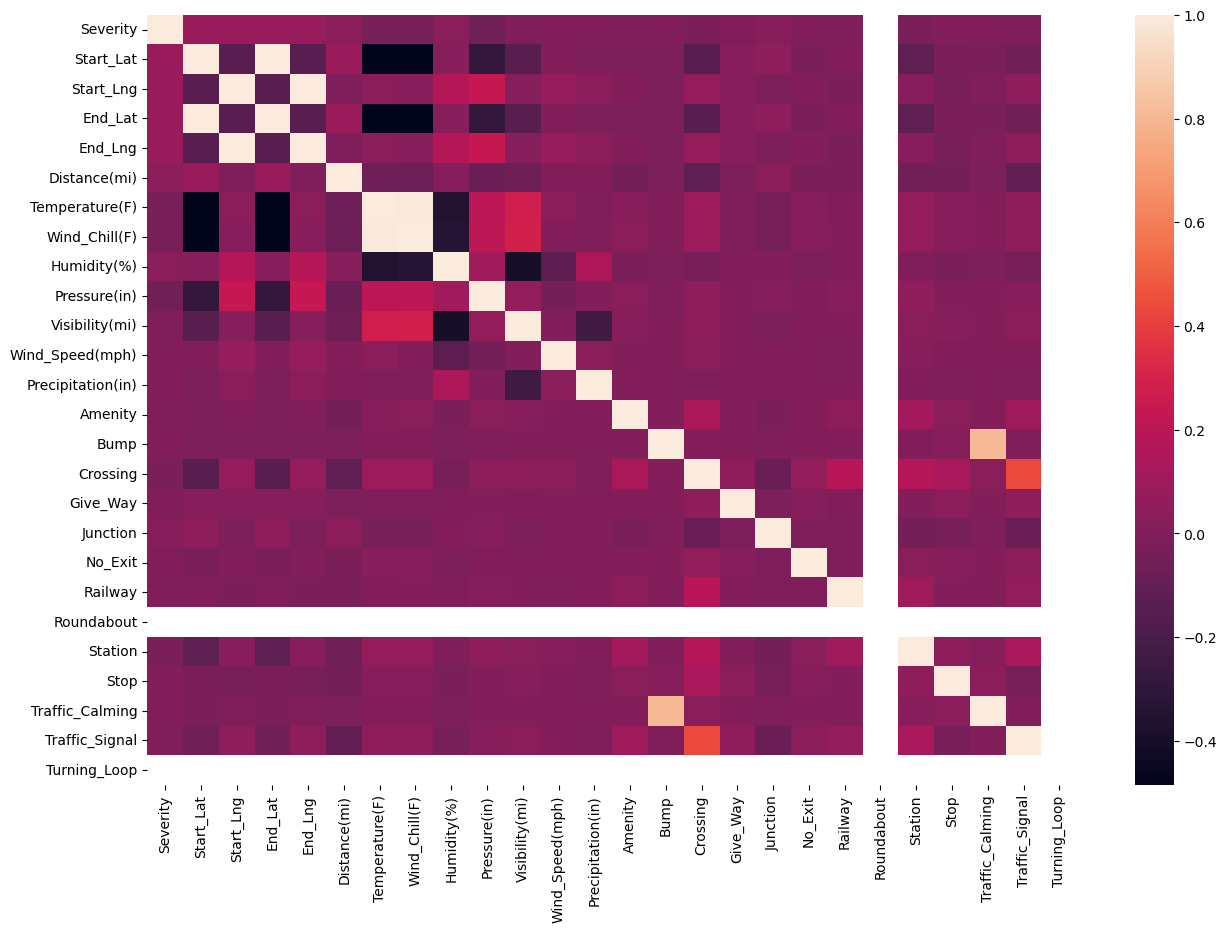

In [9]:
fig, ax = plt.subplots(figsize = (15, 10)) #Figsize helps make the figure as big or small it needs to to be able to read

sns.heatmap(clean_dataset.corr(numeric_only = True), ax = ax)

### STEP 5: Pair plot, boxplot, Histograms

#### Pair plot between 3 values from the dataset

In [10]:
px.scatter_matrix(clean_dataset, dimensions=['Severity','Temperature(F)', 'Wind_Chill(F)'])

fig = px.scatter_matrix(clean_dataset, dimensions=['Severity','Temperature(F)', 'Wind_Chill(F)'], height=900)  # Update height of diagram to make more space for the names

fig.show()

### Box plot

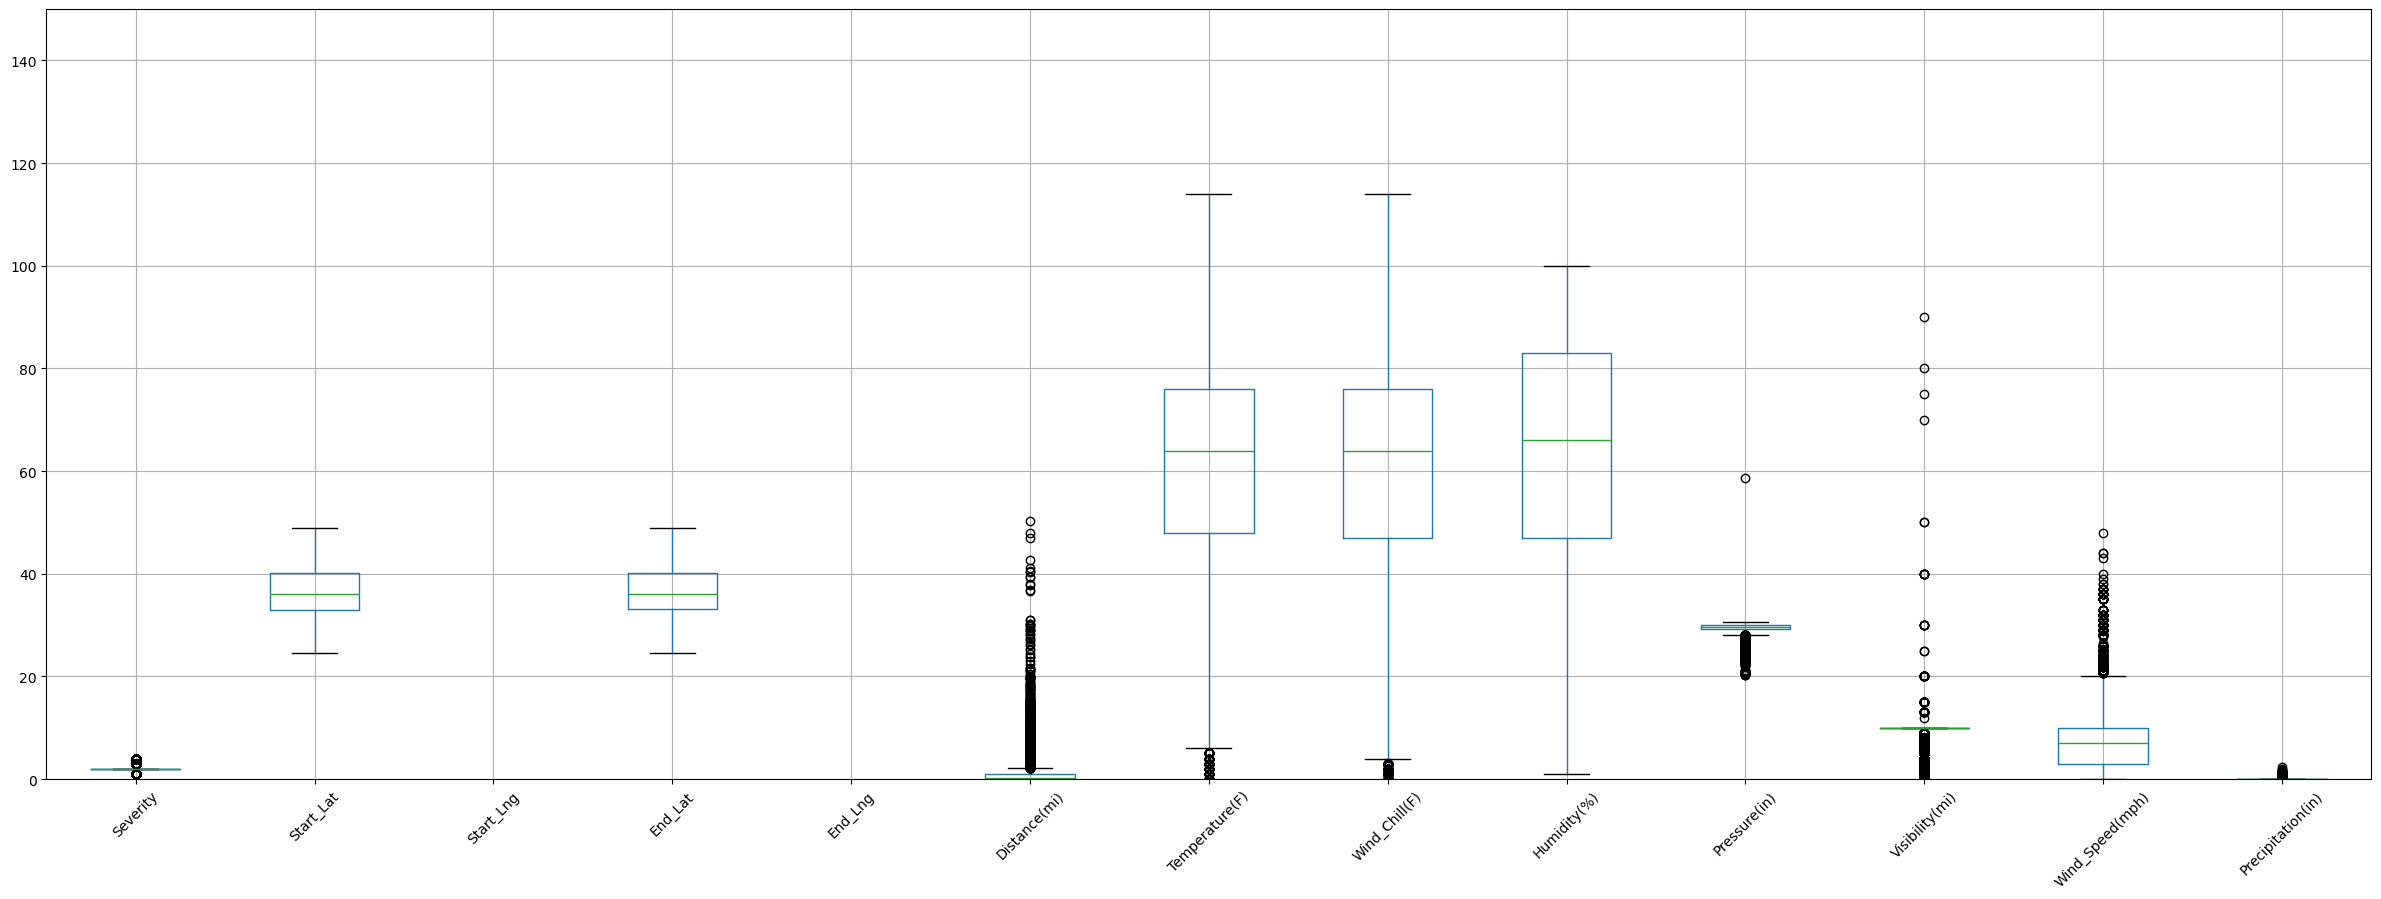

In [11]:
plt.figure(figsize = (30, 10)) #make the plot bigger for readability
clean_dataset.select_dtypes(include=['number']).boxplot(rot = 45) #Display only the numercial values on the plot, rotate the labels 45 degrees
plt.ylim(0, 150) # limmit the Y axis to 150 all values (except 1) are in that range
plt.show()

### Histogram

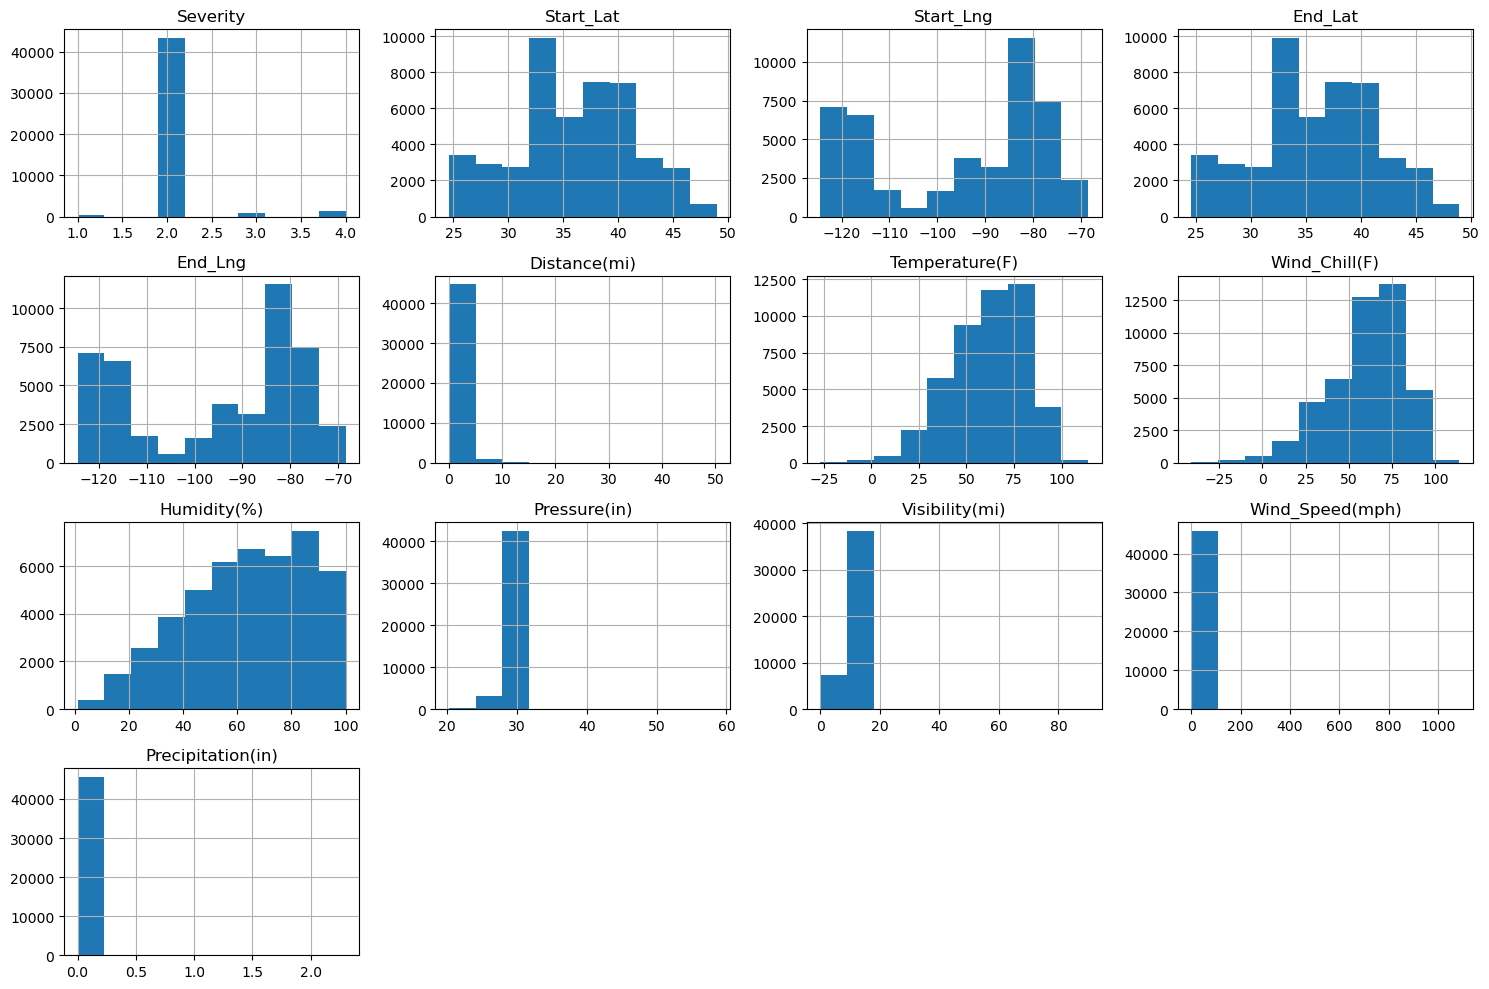

In [12]:
clean_dataset.hist(figsize=(15,10)) #fix the size so it is readable
plt.tight_layout() #Fix the layout so all diagrams are not overlapping
plt.show()